In [3]:
import matplotlib.pyplot as plt
import nibabel
import numpy as np
import pandas as pd
from pathlib import Path
from skimage.transform import rescale

In [5]:
folds = {
    "fold_0": [
        "1029_18_4",
        "1036_18",
        "1159_18_4",
        "1184_18",
        "1216_18",
        "1254_18",
        "1257_18",
        "1258_18",
        "1326_18",
        "1360_18",
        "1484_18_4",
        "1515_18_4",
        "1566_18",
        "1573_18_4",
        "1646_18",
        "1744_18",
        "1765_18_4",
        "1769_18",
        "1781_18",
        "1788_18_4",
        "1795_18_",
        "423_18",
        "607_18",
        "608_18_4",
        "660_18_4",
        "672_18_4",
        "788_18",
        "Patient_1000314",
        "Patient_102117",
        "Patient_103717",
        "Patient_104514",
        "Patient_109414",
        "Patient_110014",
        "Patient_110816",
        "Patient_120115",
        "Patient_12214",
        "Patient_123816",
        "Patient_129816",
        "Patient_135915",
        "Patient_137315",
        "Patient_138316",
        "Patient_138516",
        "Patient_15215",
        "Patient_20717",
        "Patient_28514",
        "Patient_2914",
        "Patient_33217",
        "Patient_51815",
        "Patient_54317",
        "Patient_59817",
        "Patient_62315",
        "Patient_62817",
        "Patient_65516",
        "Patient_74417",
        "Patient_75116",
        "Patient_89117",
        "Patient_92114",
        "Patient_9315",
        "Patient_95717",
        "Patient_98817"
    ],
    "fold_1": [
        "1019_18",
        "1034_18_4",
        "1056_18_4",
        "1096_18",
        "1112_19_4",
        "1214_18",
        "1255_18",
        "1267_18_4",
        "1275_19_4",
        "1333_18",
        "1354_18_4",
        "1421_18",
        "1470_18_4",
        "1541_18_4",
        "1635_18",
        "1702_18",
        "1733_18",
        "1734_18",
        "1743_18_4",
        "1746_18_4",
        "1764_18_4",
        "255_18",
        "322_18_4",
        "351_18",
        "541_18",
        "558_18_4",
        "575_18_4",
        "593_18",
        "644_19_4",
        "664_18_4",
        "688_18",
        "745_18_4",
        "770_18",
        "875_18_4",
        "925_18_4",
        "946_18",
        "971_18_4",
        "Patient_1000815",
        "Patient_105215",
        "Patient_12115",
        "Patient_129316",
        "Patient_129415",
        "Patient_130514",
        "Patient_136415",
        "Patient_158716",
        "Patient_161316",
        "Patient_24117",
        "Patient_24815",
        "Patient_45217",
        "Patient_5117",
        "Patient_56717",
        "Patient_59315",
        "Patient_61715",
        "Patient_61916",
        "Patient_66615",
        "Patient_69515",
        "Patient_70614",
        "Patient_76516",
        "Patient_83714",
        "Patient_98814"
    ],
    "fold_2": [
        "1028_18_4",
        "1043_18_4",
        "1072_19",
        "1164_18",
        "1170_18_4",
        "1185_18_4",
        "1302_18_4",
        "1357_19_4",
        "1362_18_4",
        "1463_18_4",
        "1501_18_4",
        "1539_18",
        "1546_18",
        "1685_18_4",
        "1770_18_4",
        "349_18_4",
        "573_18_4",
        "668_18_4",
        "705_18_4",
        "746_19_4",
        "826_18_4",
        "856_19_4",
        "923_18",
        "979_18_4",
        "990_18_4",
        "Patient_1001316",
        "Patient_107017",
        "Patient_109017",
        "Patient_111016",
        "Patient_122315",
        "Patient_12417",
        "Patient_127916",
        "Patient_131416",
        "Patient_132216",
        "Patient_133916",
        "Patient_136715",
        "Patient_136915",
        "Patient_140316",
        "Patient_146716",
        "Patient_15817",
        "Patient_1815",
        "Patient_22117",
        "Patient_24717",
        "Patient_43316",
        "Patient_43515",
        "Patient_48417",
        "Patient_48517",
        "Patient_49617",
        "Patient_52315",
        "Patient_716",
        "Patient_72715",
        "Patient_8017",
        "Patient_83217",
        "Patient_84116",
        "Patient_87114",
        "Patient_88817",
        "Patient_88917",
        "Patient_90517",
        "Patient_90616",
        "Patient_99715"
    ]
}

In [10]:
list(root.glob('*'))

[PosixPath('/anvar/results/bgpd_4a_resamp_300/predictions_best_epoch=234-dice_mean=73_79_task=40_fold=1_tta'),
 PosixPath('/anvar/results/bgpd_4a_resamp_300/predictions_best_epoch=226-dice_mean=73_37_task=40_fold=0_tta'),
 PosixPath('/anvar/results/bgpd_4a_resamp_300/predictions_best_epoch=194-dice_mean=72_52_task=40_fold=2_tta')]

In [118]:
def get_volumes(fold0, fold1, fold2):
    volumes = dict()
    for patient in fold0.glob('*'):
        if patient.name.split('.')[0] in folds['fold_0']:
            prediction = np.load(patient)
            volume = (prediction['arr_0'][0] > 0.5).sum() / 1000
            volumes[patient.name.split('.')[0]]  = volume

    for patient in fold1.glob('*'):
        if patient.name.split('.')[0] in folds['fold_1']:
            prediction = np.load(patient)
            volume = (prediction['arr_0'][0] > 0.5).sum() / 1000
            volumes[patient.name.split('.')[0]]  = volume

    for patient in fold2.glob('*'):
        if patient.name.split('.')[0] in folds['fold_2']:
            prediction = np.load(patient)
            volume = (prediction['arr_0'][0] > 0.5).sum() / 1000
            volumes[patient.name.split('.')[0]]  = volume
    
    return volumes    

def get_predictions(fold0, fold1, fold2):
    predictions = dict()
    for patient in fold0.glob('*'):
        if patient.name.split('.')[0] in folds['fold_0']:
            prediction = np.load(patient)
            prediction = prediction['arr_0'][0] > 0.5
            predictions[patient.name.split('.')[0]]  = prediction

    for patient in fold1.glob('*'):
        if patient.name.split('.')[0] in folds['fold_1']:
            prediction = np.load(patient)
            prediction = prediction['arr_0'][0] > 0.5
            predictions[patient.name.split('.')[0]]  = prediction

    for patient in fold2.glob('*'):
        if patient.name.split('.')[0] in folds['fold_2']:
            prediction = np.load(patient)
            prediction = prediction['arr_0'][0] > 0.5
            predictions[patient.name.split('.')[0]]  = prediction
    
    return predictions    

In [119]:
root = Path('/anvar/results/bgpd_4a_resamp_300')
fold0_4_resamp = root / 'predictions_best_epoch=226-dice_mean=73_37_task=40_fold=0_tta'
fold1_4_resamp = root / 'predictions_best_epoch=234-dice_mean=73_79_task=40_fold=1_tta'
fold2_4_resamp = root / 'predictions_best_epoch=194-dice_mean=72_52_task=40_fold=2_tta'

root = Path('/anvar/results/bgpd_5_ss_shared')
fold0_4_ss = root / 'predictions_best_epoch=185-dice_mean=75_45_task=51_fold=0_tta'
fold1_4_ss = root / 'predictions_best_epoch=228-dice_mean=75_79_task=51_fold=1_tta'
fold2_4_ss = root / 'predictions_best_epoch=205-dice_mean=72_80_task=51_fold=2_tta'

volumes_4_resamp = get_volumes(fold0_4_resamp, fold1_4_resamp, fold2_4_resamp)
volumes_4_ss = get_volumes(fold0_4_ss, fold1_4_ss, fold2_4_ss)

predictions_4_resamp = get_predictions(fold0_4_resamp, fold1_4_resamp, fold2_4_resamp)
predictions_4_ss = get_predictions(fold0_4_ss, fold1_4_ss, fold2_4_ss)

predictions_4_resamp['1795_18'] = predictions_4_resamp['1795_18_']
predictions_4_ss['1795_18'] = predictions_4_ss['1795_18_']
del predictions_4_resamp['1795_18_']
del predictions_4_ss['1795_18_']


# ground truth masks

volumes_ground_truth = dict()
ground_truth = dict()
root = Path('/anvar/results/labels')
for patient in root.glob('*'):
    mask = nibabel.load(patient).get_fdata()
    ground_truth[patient.name.split('.')[0].strip('_seg')] = mask
    volume = mask.sum() / 1000
    volumes_ground_truth[patient.name.split('.')[0].strip('_seg')] = volume

In [54]:
# /data/anvar/public_datasets/preproc_study/bgpd

# mask_1 = nibabel.load('/anvar/results/labels/607_18_seg.nii.gz').get_fdata()
# mask_2 = nibabel.load('/anvar/public_datasets/preproc_study/bgpd/4a_resamp/607_18/mask_GTV_FLAIR.nii.gz').get_fdata()

In [61]:
df = pd.DataFrame()
df['4_resample'] = [v for p,v in sorted(volumes_4_resamp.items(), key=lambda x: x[0])]
df['4_skull'] = [v for p,v in sorted(volumes_4_ss.items(), key=lambda x: x[0])]
df['ground_truth'] = [v for p,v in sorted(volumes_ground_truth.items(), key=lambda x: x[0])]
df['4_skull_erorr'] = df['ground_truth'] - df['4_skull']
df['4_skull_erorr,%'] = df['4_skull_erorr'] / df['ground_truth']*100

df['4_resample_erorr'] = df['ground_truth'] - df['4_resample']
df['4_resample_erorr,%'] = df['4_resample_erorr'] / df['ground_truth']*100

In [206]:
from dpipe.im.metrics import dice_score

scores_predictions_4_resamp = dict()
for key, volume in sorted(predictions_4_resamp.items(), key=lambda x: x[0]):
    gt_volume = ground_truth[key] > 0
    scores_predictions_4_resamp[key] = dice_score(volume.T, gt_volume)
    
scores_predictions_4_ss = dict()
for key, volume in sorted(predictions_4_ss.items(), key=lambda x: x[0]):
    gt_volume = ground_truth[key] > 0
    scores_predictions_4_ss[key] = dice_score(volume.T, gt_volume)
    
df['PatientID'] = scores_predictions_4_ss.keys()
df['Dice_resample'] = scores_predictions_4_resamp.values()
df['Dice_skull'] = scores_predictions_4_ss.values()

In [213]:
# df = df.drop(29, 0) # Remove 1362_18_4  who have a wrong GT mask

# Plots

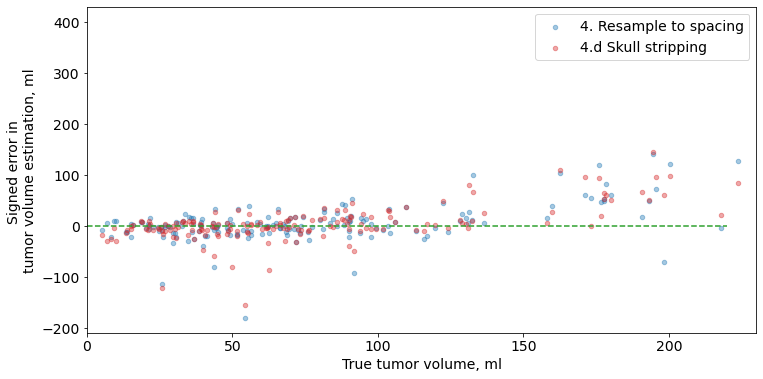

In [214]:
# Absolute difference

plt.figure(figsize=(12,6))
plt.scatter(df['ground_truth'], df['ground_truth']-df['4_resample'], s = 20, alpha=0.4, c='tab:blue', label='4. Resample to spacing')
plt.scatter(df['ground_truth'], df['ground_truth']-df['4_skull'], s=20, alpha=0.4, c='tab:red', label='4.d Skull stripping')
plt.hlines(0, 0, 220, linestyles='--', colors='tab:green')
plt.xlim(0, 230)
plt.xlabel('True tumor volume, ml')
plt.ylabel('Signed error in \ntumor volume estimation, ml')
plt.legend();

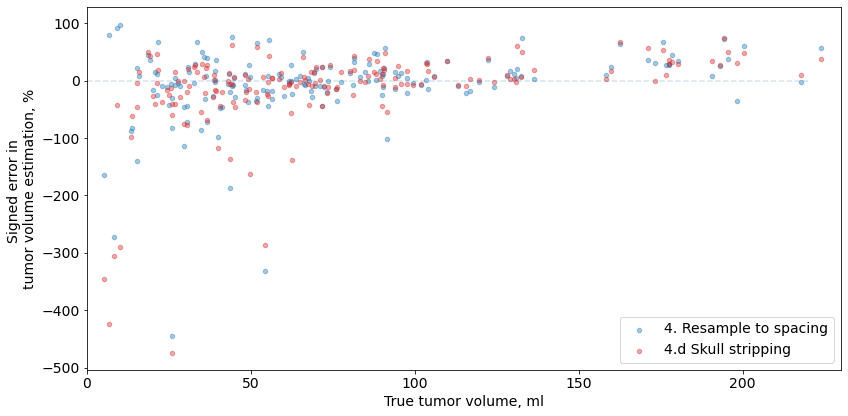

In [215]:
# Percentage difference
font = {'size'   : 14}
plt.rc('font', **font)
plt.figure(figsize=(12,6))
plt.scatter(df['ground_truth'], (df['ground_truth']-df['4_resample'])/df['ground_truth']*100, s = 20, alpha=0.4, c='tab:blue', label='4. Resample to spacing')
plt.scatter(df['ground_truth'], (df['ground_truth']-df['4_skull'])/df['ground_truth']*100, s=20, alpha=0.4, c='tab:red', label='4.d Skull stripping')
plt.hlines(0, 0, 220, linestyles='--', alpha=0.2, colors='tab:blue')
plt.xlim(0, 230)
plt.xlabel('True tumor volume, ml')
plt.ylabel('Signed error in \ntumor volume estimation, %')
plt.legend();
plt.tight_layout()
plt.savefig('/home/anvar/volume_errors_percentage.png')

In [216]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [217]:
mean_absolute_error(df['4_resample'], df['ground_truth'])

28.029888268156427

In [228]:
mean_absolute_percentage_error(df['4_resample'], df['ground_truth'])

3.03964310118791

In [219]:
mean_absolute_error(df['4_skull'], df['ground_truth'])

26.016100558659215

In [229]:
mean_absolute_percentage_error(df['4_skull'], df['ground_truth'])

0.36463643818277863

In [232]:
df['ground_truth'].mean() * 0.03

2.4665730167597757

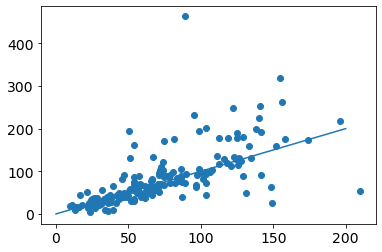

In [221]:
plt.scatter(df['4_skull'], df['ground_truth'])
plt.plot([0,200], [0,200])

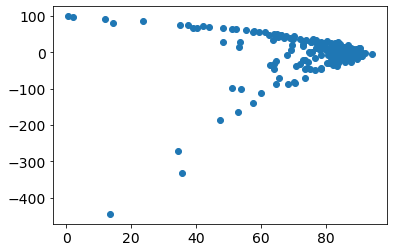

In [226]:
plt.scatter(df['Dice_resample']*100, df['4_resample_erorr,%']);

In [243]:
df['diff'] = df['Dice_skull'] - df['Dice_resample']

In [244]:
df.sort_values('diff')

,4_resample,4_skull,ground_truth,4_skull_erorr,4_resample_erorr,"4_skull_erorr,%","4_resample_erorr,%",PatientID,Dice_resample,Dice_skull,diff
172,46.363,131.266,49.862,-81.404,3.499,-163.258594,7.017368,Patient_90517,0.834773,0.525507,-0.309266
57,18.919,11.218,21.293,10.075,2.374,47.316019,11.149204,255_18,0.877748,0.670973,-0.206775
92,103.447,51.264,131.334,80.070,27.887,60.966696,21.233649,Patient_102117,0.696249,0.506030,-0.190219
170,13.752,23.110,5.189,-17.921,-8.563,-345.365196,-165.022162,Patient_88917,0.527955,0.348634,-0.179321
94,110.725,74.424,171.229,96.805,60.504,56.535400,35.335136,Patient_104514,0.767239,0.604088,-0.163151
...,...,...,...,...,...,...,...,...,...,...,...
38,63.101,29.959,29.610,-0.349,-33.491,-1.178656,-113.107058,1546_18,0.599519,0.885192,0.285673
133,0.815,13.188,9.316,-3.872,8.501,-41.562903,91.251610,Patient_24717,0.119830,0.452009,0.332178
65,0.237,39.118,10.027,-29.091,9.790,-290.126658,97.636382,575_18_4,0.020655,0.364310,0.343655
22,6.969,17.666,21.698,4.032,14.729,18.582358,67.881832,1275_19_4,0.403181,0.765522,0.362340


In [254]:
x = predictions_4_resamp['1275_19_4']
y = predictions_4_ss['1275_19_4']
z = ground_truth['1275_19_4']

image = nibabel.load('/anvar/public_datasets/preproc_study/bgpd/4a_resamp/1275_19_4/FLAIR.nii.gz').get_fdata()

In [251]:
x.shape

(240, 240, 180)

In [255]:
z.shape

(180, 240, 240)

In [252]:
image.shape

(180, 240, 240)

In [256]:
slice3d(image, x.T, y.T, z)

interactive(children=(IntSlider(value=0, continuous_update=False, description='idx', max=239), Output()), _dom…

In [179]:
image = nibabel.load('/anvar/public_datasets/preproc_study/bgpd/4a_resamp/1362_18_4/FLAIR.nii.gz').get_fdata()
# image = nibabel.load('/anvar/public_datasets/preproc_study/bgpd/4a_resamp/Patient_129816/FLAIR.nii.gz').get_fdata()

# image = nibabel.load('/anvar/public_datasets/preproc_study/bgpd/4a_resamp/Patient_24717/FLAIR.nii.gz').get_fdata()

In [195]:
# root = Path('/anvar/public_datasets/preproc_study/bgpd/orig/Patient_129816')
# img = nibabel.load(root / 'FLAIR.nii.gz').get_fdata()
# m = nibabel.load(root / 'mask_GTV_FLAIR.nii.gz').get_fdata()

In [196]:
# slice3d(img, m, img+m*400)

# check raw data

In [197]:
# root = Path('/anvar/private_datasets/glioma_burdenko/dcm2nii_training_set_GOST/1362_18_4')

In [198]:
# from pydicom import dcmread
# from dicom_csv import join_tree, order_series, stack_images

In [199]:
# images2d[0]

In [200]:
# images2d = [dcmread(filename) for filename in (root / 'REF').glob('*')]
# image3d = stack_images(order_series(images2d))
# image3d = np.clip(image3d, 0, 80)

# mask2d = [dcmread(filename) for filename in (root / 'MASK_DICOM_CT').glob('*')]
# mask3d = stack_images(order_series(mask2d))

In [201]:
# images2d = [dcmread(filename) for filename in (root / 'CT1').glob('*')]
# image3d_ct = stack_images(order_series(images2d))